# Первое задание. Получение фотографий из альбомов группы


In [ ]:
!pip install vk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# Импортируем нужные модули
from urllib.request import urlretrieve
import vk, os, time, math

# Авторизация

#login = ''
#password = ''
#vk_id = ''

#session = vk.AuthSession(app_id=vk_id, user_login=login, user_password=password)
#vkapi = vk.API(session, v='5.81')

#session = vk.Session(access_token='vk1.a.a_R9ETbrEZWLHlQj0WgkgmtIFZXXG7RGqQ9n99JlFbjoxUP1oGYAUcXdNeVfyE-Hr9aNvI-cd3Dms-fQ8GIxJtjITATRgzHQWlcjt7Ti_TQfKtCDZ96nkg1nszoivfzojqntBPPQFKKkpSUEkH8C3GxVx1hN1PziRo62tj5UE0dkQSJmYKxdhD52EwNi7UCEzo3XDuGxa-ZIZ118a2FNHg')
vkapi = vk.API(access_token='vk1.a.DE5ag4BsIYnNZnSq-pxCt1kyRc4KVjNuR6M8qzn-0qTCH0QMtdgaYPzrpKVQP25aLV-FFZcKp9exPS5Z9AMw5iAhL9BpCiIzgMyu3BwU-zrVI5YC6u5R3vqcS01Tc5Wys5z_Hg0Qfu24IY0nXS4Wo72VPs1rI444mOG3lgHASpw9ME0xVkC5bTjGAP6EPu9Y6544otsyabWRofiFfBIviQ', v='5.81')


In [ ]:
main_folder = '/content/drive/MyDrive/saved_Lab2'
if not os.path.exists(main_folder):
  os.mkdir(main_folder)

In [ ]:
ownerId = '-16955'
albums = vkapi.photos.getAlbums(owner_id=ownerId)

In [ ]:
def RetrievePhotosFromAlbums(owner_id, album_id):
  album = vkapi.photos.getAlbums(owner_id=owner_id, album_ids=album_id)
  photos_count = album["items"][0]["size"]

  counter = 0 # текущий счетчик
  prog = 0 # процент загруженных
  breaked = 0 # не загружено из-за ошибки
  time_now = time.time() # время старта

  #Создадим каталоги
  photo_folder = '/content/drive/MyDrive/saved_Lab2/album{0}_{1}'.format(owner_id, album_id)
  if not os.path.exists(photo_folder):
    os.mkdir(photo_folder)

  for j in range(math.ceil(photos_count / 1000)): # Подсчитаем;сколько раз нужно получать список фото, так как число получится не целое - округляем в большую сторону
    photos = vkapi.photos.get(owner_id=owner_id, album_id=album_id, count=1000, offset=j*1000) #;Получаем список фото
    for photo in photos["items"]:
        counter += 1
        url = photo["sizes"][0]["url"] # Получаем адрес изображения
        print('Загружаю фото № {} из {}. Прогресс: {} %'.format(counter, photos_count, prog))
        prog = round(100/photos_count*counter,2)
        try:
            urlretrieve(url, photo_folder + "/" + os.path.split(url)[1]) # Загружаем и сохраняем файл
        except Exception:
            print('Произошла ошибка, файл пропущен.')
            breaked += 1
            continue

  time_for_dw = time.time() - time_now
  print("\nВ очереди было {} файлов. Из них удачно загружено {} файлов, {} не удалось загрузить. Затрачено времени: {} сек.". format(photos_count, photos_count-breaked, breaked, round(time_for_dw,1)))

In [ ]:
for item in albums['items']:
  RetrievePhotosFromAlbums(ownerId, item['id'])

Загружаю фото № 1 из 51. Прогресс: 0 %
Загружаю фото № 2 из 51. Прогресс: 1.96 %
Загружаю фото № 3 из 51. Прогресс: 3.92 %
Загружаю фото № 4 из 51. Прогресс: 5.88 %
Загружаю фото № 5 из 51. Прогресс: 7.84 %
Загружаю фото № 6 из 51. Прогресс: 9.8 %
Загружаю фото № 7 из 51. Прогресс: 11.76 %
Загружаю фото № 8 из 51. Прогресс: 13.73 %
Загружаю фото № 9 из 51. Прогресс: 15.69 %
Загружаю фото № 10 из 51. Прогресс: 17.65 %
Загружаю фото № 11 из 51. Прогресс: 19.61 %
Загружаю фото № 12 из 51. Прогресс: 21.57 %
Загружаю фото № 13 из 51. Прогресс: 23.53 %
Загружаю фото № 14 из 51. Прогресс: 25.49 %
Загружаю фото № 15 из 51. Прогресс: 27.45 %
Загружаю фото № 16 из 51. Прогресс: 29.41 %
Загружаю фото № 17 из 51. Прогресс: 31.37 %
Загружаю фото № 18 из 51. Прогресс: 33.33 %
Загружаю фото № 19 из 51. Прогресс: 35.29 %
Загружаю фото № 20 из 51. Прогресс: 37.25 %
Загружаю фото № 21 из 51. Прогресс: 39.22 %
Загружаю фото № 22 из 51. Прогресс: 41.18 %
Загружаю фото № 23 из 51. Прогресс: 43.14 %
Загружа

# Второе задание. Получить данные из двух групп

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

In [ ]:
def RetrieveAllMembers(groupId):
  response = vkapi.groups.getMembers(group_id=groupId, fields = { 'country', 'sex' })
  members = response['items']
  currOffset = 1000
  count = response['count']
  while (currOffset < count):
    response = vkapi.groups.getMembers(group_id=groupId, offset=currOffset, fields = { 'country', 'sex' })
    members += response['items']
    currOffset += 1000
    sleep(0.4)
  return members  

In [ ]:
group1 = 'ru.cavs'
group2 = 'oklahoma_city_thunder'

In [ ]:
members1 = RetrieveAllMembers(group1)
members2 = RetrieveAllMembers(group2)

In [ ]:
# количество учасстников полученных из группы Cleveland Cavaliers
len(members1)

9459

In [ ]:
# количество учасстников полученных из группы Oklahoma City Thunder
len(members2)

6865

In [ ]:
table1 = pd.json_normalize(members1)
table2 = pd.json_normalize(members2)

In [ ]:
table1

,id,sex,first_name,last_name,country.id,country.title
0,1425,2,Petr,Marmuzov,1.0,Россия
1,5682,2,Роман,Фокин,1.0,Россия
2,31688,2,Александр,Новиков,1.0,Россия
3,101435,2,Игорь,Самуилов,1.0,Россия
4,107487,2,Женя,Госьков,1.0,Россия
...,...,...,...,...,...,...
9454,748748428,2,Абдулла,Нащин,NaN,NaN
9455,749269329,2,Виталя,Рахимзянов,1.0,Россия
9456,753249860,2,Фуад,Панахов,NaN,NaN
9457,755141797,2,Алексей,Алейник,NaN,NaN


In [ ]:
table2

,id,sex,first_name,last_name,country.id,country.title
0,83654,2,Максим,Ремезов,1.0,Россия
1,92843,2,Денис,Расторгуев,1.0,Россия
2,95842,2,Алексей,Калинкин,1.0,Россия
3,130894,2,Андрей,Поляков,1.0,Россия
4,165895,2,Евгений,Дурягин,1.0,Россия
...,...,...,...,...,...,...
6860,752858491,2,Тимофей,Молчанов,NaN,NaN
6861,754267227,2,Александр,Жовнерик,NaN,NaN
6862,756337649,2,Niko,George,NaN,NaN
6863,756940677,2,Руслан,Махметов,NaN,NaN


In [ ]:
# Пересечение пользователей между двумя группами
totalTable = table1.append(table2, ignore_index=True)
duplicatedRows = totalTable[totalTable.duplicated()]
duplicatedRows

,id,sex,first_name,last_name,country.id,country.title
9465,340205,2,Джангар,Болдырев,1.0,Россия
9472,922894,2,Миронов,Юрий,1.0,Россия
9474,930556,2,Олег,Марков,1.0,Россия
9479,1002501,2,Дмитрий,Снимщиков,1.0,Россия
9486,1152422,2,Артур,Ищанов,1.0,Россия
...,...,...,...,...,...,...
16305,742926926,1,Анастасия,Канунникова,NaN,NaN
16309,744458498,1,Елизавета,Белецкая,NaN,NaN
16311,746717738,2,Вадим,Новиков,NaN,NaN
16312,746985050,2,Рома,Семенюк,NaN,NaN


Сравнение данных внутри групп. Для наглядности будут использоваться графики.

In [ ]:
countryResult1 = table1['country.title'].value_counts()
countryResult1

Россия               5042
Украина               769
США                   427
Казахстан             372
Беларусь              306
                     ... 
Куба                    1
Буркина-Фасо            1
Норвегия                1
Антигуа и Барбуда       1
Сенегал                 1
Name: country.title, Length: 95, dtype: int64

In [ ]:
countryResult2 = table2['country.title'].value_counts()
countryResult2

Россия                     3620
Украина                     542
США                         323
Казахстан                   251
Беларусь                    221
                           ... 
Пуэрто-Рико                   1
Марокко                       1
Тунис                         1
Сомали                        1
Виргинские острова, США       1
Name: country.title, Length: 97, dtype: int64

In [ ]:
countryDF = pd.DataFrame(countryResult1)
countryDF.rename(columns = {'country.title' : 'Cleveland Cavaliers'}, inplace = True)
countryDF['Oklahoma City Thunder'] = pd.Series(countryResult2)
countryDF = countryDF.astype({'Cleveland Cavaliers': np.float}, errors='ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
countryDF

,Cleveland Cavaliers,Oklahoma City Thunder
Россия,5042.0,3620.0
Украина,769.0,542.0
США,427.0,323.0
Казахстан,372.0,251.0
Беларусь,306.0,221.0
...,...,...
Куба,1.0,4.0
Буркина-Фасо,1.0,1.0
Норвегия,1.0,4.0
Антигуа и Барбуда,1.0,1.0


Интересно, что среди регионов топ 5 являются: Россия, Украина, США, Казахстан, Беларусь (именно в таком порядке). Поскольку стран очень много (95), то решено на график выводить лишь первые 10 стран.

In [ ]:
countryCount = len(countryDF.index)
countries = countryDF.index
countries = countries.to_list()
countries = countries[:10]
countriesIndex = list(range(1, len(countries) + 1))
group1Results = countryDF['Cleveland Cavaliers'].to_list()
group1Results = group1Results[:10]
group2Results = countryDF['Oklahoma City Thunder'].to_list()
group2Results = group2Results[:10]

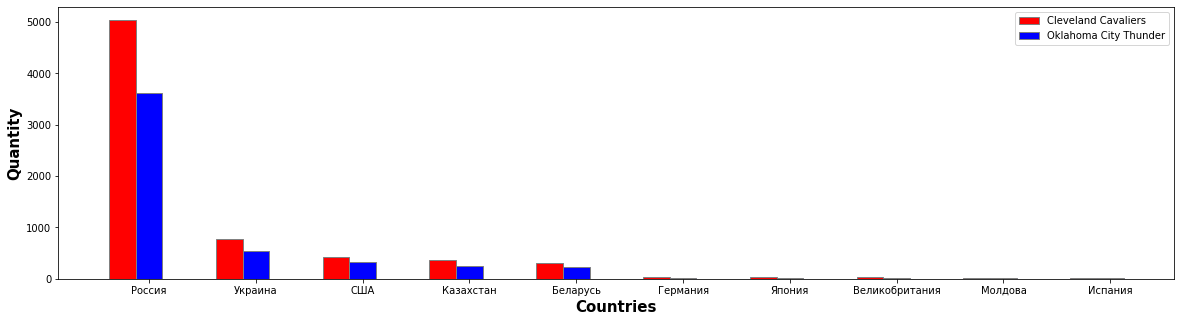

In [ ]:
plt.figure(figsize = (20, 5))

barWidth = 0.25
br1 = np.arange(len(countries))
br2 = [x + barWidth for x in br1]

plt.bar(br1, group1Results, color ='r', width = barWidth,
        edgecolor ='grey', label ='Cleveland Cavaliers')
plt.bar(br2, group2Results, color ='b', width = barWidth,
        edgecolor ='grey', label ='Oklahoma City Thunder')

plt.xlabel('Countries', fontweight ='bold', fontsize = 15)
plt.ylabel('Quantity', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(countries))], countries)

plt.legend()
plt.show()

Далее будут представлена сравнительная харктеристика по полу среди всех полученных участников.  

In [ ]:
sexResult1 = table1['sex'].value_counts()
sexResult1 

2    8790
1     661
0       8
Name: sex, dtype: int64

In [ ]:
sexResult2 = table2['sex'].value_counts()
sexResult2 

2    6477
1     382
0       6
Name: sex, dtype: int64

Стоит отметить, что 1 - Мужской, 2 - Женский, 0 - Не указан. Также стоит отметить, что в обоих группах отчетливо видно преобладание мужского пола, что логично, учитывая тематику данных пабликов.

In [ ]:
sexResult1 = sexResult1.to_list()
sexResult2 = sexResult2.to_list()
sex = ['Мужской', 'Женский', 'Не указан']

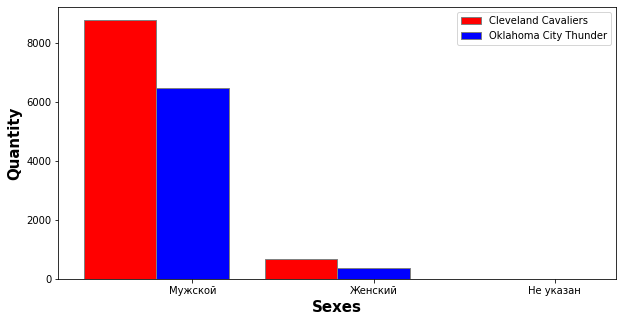

In [ ]:
plt.figure(figsize = (10, 5))

barWidth = 0.4
br1 = np.arange(len(sex))
br2 = [x + barWidth for x in br1]

plt.bar(br1, sexResult1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Cleveland Cavaliers')
plt.bar(br2, sexResult2, color ='b', width = barWidth,
        edgecolor ='grey', label ='Oklahoma City Thunder')

plt.xlabel('Sexes', fontweight ='bold', fontsize = 15)
plt.ylabel('Quantity', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(sex))], sex)

plt.legend()
plt.show()